In [1]:
import numpy as np 
import pandas as pd
import os
from tqdm import tqdm, tqdm_notebook
from scipy import stats
from random import choice

#from joblib import Parallel, delayed
import gc


import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

# # Fix seeds
# from numpy.random import seed
# seed(639)
# from tensorflow import set_random_seed
# set_random_seed(5944)

In [2]:
df_train = pd.read_hdf("../input/train.hdf", key='0')

In [3]:
df_train['diff_time_to_failure'] = 0
df_train.iloc[0:-1,2] = df_train['time_to_failure'].diff().dropna().values
df_train['is_failure'] = df_train['diff_time_to_failure'] > 0

<BarContainer object of 15 artists>

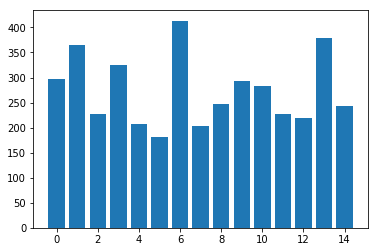

In [12]:
failure_spans = np.diff(df_train[df_train.is_failure].index)
plt.bar(range(len(failure_spans)), failure_spans/150000)

In [13]:
failure_spans

array([44429304, 54591478, 34095097, 48869367, 31010810, 27176955,
       62009332, 30437370, 37101561, 43991032, 42442743, 33988602,
       32976890, 56791029, 36417529])

In [21]:
df_train[df_train.is_failure]

,acoustic_data,time_to_failure,diff_time_to_failure,is_failure
5656573,4,0.000795,11.540005,True
50085877,8,0.000695,14.179905,True
104677355,6,0.000795,8.855905,True
138772452,3,0.001095,12.692904,True
187641819,7,0.000595,8.054905,True
218652629,5,0.001095,7.057905,True
245829584,1,0.000495,16.106905,True
307838916,7,0.000695,7.904904,True
338276286,4,0.000195,9.636905,True
375377847,0,0.000495,11.425904,True


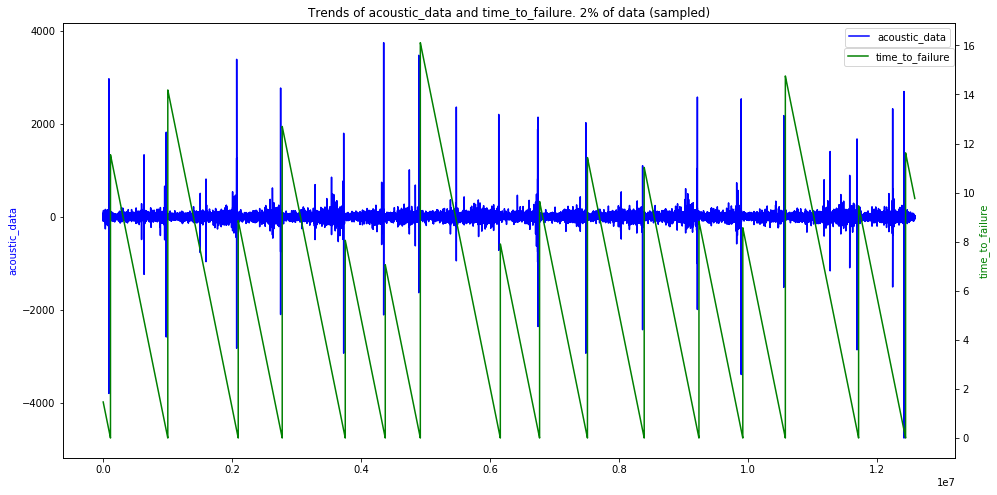

In [14]:
# インデックスが50の倍数のデータのみ抽出して描画
train_acoustic_data_small = df_train['acoustic_data'].values[::50]
train_time_to_failure_small = df_train['time_to_failure'].values[::50]

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time_to_failure. 2% of data (sampled)")
plt.plot(train_acoustic_data_small, color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(train_time_to_failure_small, color='g')
ax2.set_ylabel('time_to_failure', color='g')
plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)

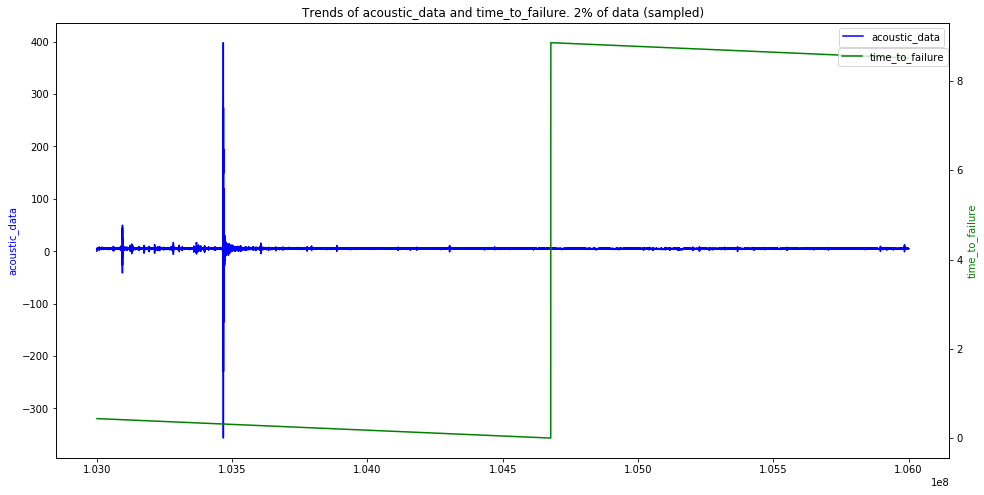

In [33]:
# インデックスが50の倍数のデータのみ抽出して描画
initial_time = 103000000
delta_time  =       150000*20

train_acoustic_data_small = df_train['acoustic_data'].iloc[initial_time:initial_time+delta_time].rolling(window=100).mean().fillna(0)
train_time_to_failure_small = df_train['time_to_failure'].iloc[initial_time:initial_time+delta_time]#.rolling(window=4000).mean().fillna(0)

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time_to_failure. 2% of data (sampled)")
plt.plot(train_acoustic_data_small, color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(train_time_to_failure_small, color='g')
ax2.set_ylabel('time_to_failure', color='g')
plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)